In [14]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import mlflow
import joblib

In [15]:
# Cargar datos
data = pd.read_csv("../data/churn_data.csv")

# Explorar datos
print(data.head())
print(data["Churn"].value_counts())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  9313-QOLTZ    Male              0      No         No      26          Yes   
1  6654-QGBZZ  Female              0      No         No       1          Yes   
2  6877-LGWXO    Male              1     Yes         No      18          Yes   
3  8020-BWHYL  Female              1      No         No      15          Yes   
4  3594-IVHJZ  Female              0      No         No       2          Yes   

  MultipleLines InternetService       OnlineSecurity  ...  \
0            No              No  No internet service  ...   
1            No              No  No internet service  ...   
2            No     Fiber optic                   No  ...   
3            No     Fiber optic                   No  ...   
4            No              No  No internet service  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service   
1  No internet s

In [16]:
# Identificar columnas categóricas
categorical_columns = data.select_dtypes(include=["object"]).columns

# Aplicar Label Encoding a cada columna categórica
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Guardar el encoder para uso futuro

print(data.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5900       1              0        0           0      26   
1        4246       0              0        0           0       1   
2        4387       1              1        1           0      18   
3        5102       0              1        0           0      15   
4        2265       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             1              0                2               1  ...   
1             1              0                2               1  ...   
2             1              0                1               0  ...   
3             1              0                1               0  ...   
4             1              0                2               1  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            1            1                1         0   


In [17]:
# Identificar columnas numéricas
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Aplicar Standard Scaler a cada columna numérica
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print(data.head())

   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0        5900       1      -0.439230        0           0 -0.259164   
1        4246       0      -0.439230        0           0 -1.278108   
2        4387       1       2.276711        1           0 -0.585226   
3        5102       0       2.276711        0           0 -0.707499   
4        2265       0      -0.439230        0           0 -1.237350   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             1              0                2               1  ...   
1             1              0                2               1  ...   
2             1              0                1               0  ...   
3             1              0                1               0  ...   
4             1              0                2               1  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            1            1                1  

In [18]:
# Dividir datos
X = data.drop("Churn", axis=1)
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Entrenar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluar modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7996845425867508
F1 Score: 0.5665529010238908


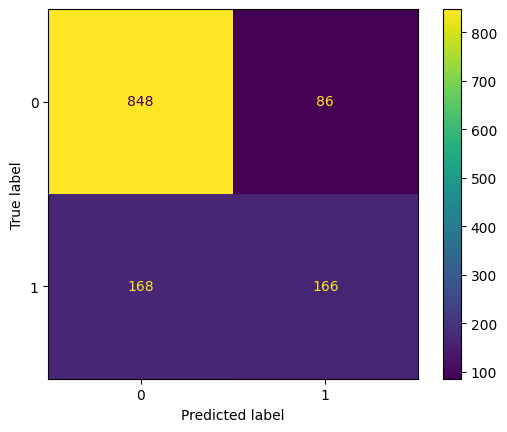

In [20]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [21]:
# Guardar LabelEncoders
joblib.dump(label_encoders, "../artifacts/label_encoders.pkl")

# Guardar StandardScaler
joblib.dump(scaler, "../artifacts/scaler.pkl")

['../artifacts/scaler.pkl']

In [22]:
# Configurar MLflow
#mlflow.set_tracking_uri("http://127.0.0.1:5000")  # URL del servidor de MLflow
mlflow.set_experiment("Churn Prediction")        # Nombre del experimento

with mlflow.start_run():
    # Entrenar modelo
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluar modelo
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Registrar métricas y modelo
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(model, "model")

2025/03/11 23:15:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [23]:
import mlflow

print("MLflow tracking URI:", mlflow.get_tracking_uri())


MLflow tracking URI: file:///c:/Users/jeisson.castano_prag/Documents/mlops-churn-prediction/notebooks/mlruns


In [24]:
mlflow.set_tracking_uri("file:///C:/Users/jeisson.castano_prag/Documents/mlops-churn-prediction/mlruns")
